In [2]:
import scipy.io as sio
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Using TensorFlow backend.


In [20]:
#loading data
DDataFile = './data/D_VLOS_channelVector_B32_U50000.mat'
DData = sio.loadmat(DDataFile)

LocationDataFile = './data/randLocationU50000VIP.mat'
locationData = sio.loadmat(LocationDataFile)


In [21]:
#preprocessing the data
D_data = DData['D']
location_data = np.transpose(locationData['location'])
location_data = location_data[:,:2]

D_data = np.transpose(np.concatenate((np.real(D_data),np.imag(D_data))))

print(D_data.shape,location_data.shape)
total, l = D_data.shape
total, d = location_data.shape

train_length = int(np.floor(total * 0.8))

impulses_train = D_data[:train_length, :]
location_train = location_data[:train_length,:]
print(total,train_length, impulses_train.shape, location_train.shape)

impulses_test = D_data[train_length:, :]
location_test = location_data[train_length:,:]

(50000, 64) (50000, 2)
50000 40000 (40000, 64) (40000, 2)


In [23]:
#Build the model
model = keras.Sequential()

keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
#model.add(Dropout(0.2)) # best 0.2
keras.layers.Conv2D(1024, 3)  #, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

# keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
# model.add(Dropout(0.2)) # best 0.2
# keras.layers.Conv2D(2048, 3)  #, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
# keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

model.add(Dense(1024, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

model.add(Dense(1024, activation = 'relu'))

model.add(Dense(1024, activation = 'relu'))
# keras.layers.normalization.BatchNormalization()
# model.add(Dropout(0.25)) # best 0.2
# model.add(Dense(1024, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

model.add(Dense(d, activation = 'linear'))  # None is different from 'linear'      ### the output layer

In [24]:
#Compilation
loss_func = 'mean_squared_error'   #   categorical_crossentropy(bad)   mean_squared_error
opt_func = keras.optimizers.Adam(lr=0.0001) #'Adam'  lr=0.2  #  RMSprop(overfiiting) sgd(overfitting)  Adadelta(overfitting)   Adam

model.compile(loss = loss_func, 
              optimizer = opt_func,
             metrics = ['mae'])

#best set: categorical_crossentropy  and sgd, but the loss and acc do not change....

In [25]:
#Train the model, iterating
early_stop = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1)
history = model.fit(impulses_train, location_train,
                    batch_size = 20, # 10,20
                    epochs = 200,
                    verbose = 2,
                   # callbacks=[early_stop], 
                    validation_split = 0.2 #0.2
                    #validation_data=(impulses_test, location_test)
                   )


Train on 32000 samples, validate on 8000 samples
Epoch 1/200
 - 99s - loss: 45114.0774 - mean_absolute_error: 171.1407 - val_loss: 26107.9606 - val_mean_absolute_error: 129.2780
Epoch 2/200
 - 97s - loss: 11615.9773 - mean_absolute_error: 81.1308 - val_loss: 5010.7468 - val_mean_absolute_error: 52.7450
Epoch 3/200
 - 98s - loss: 2652.5570 - mean_absolute_error: 37.2889 - val_loss: 1494.9052 - val_mean_absolute_error: 28.8643
Epoch 4/200
 - 96s - loss: 1166.5381 - mean_absolute_error: 25.6130 - val_loss: 975.9360 - val_mean_absolute_error: 23.3995
Epoch 5/200
 - 95s - loss: 847.9850 - mean_absolute_error: 21.8333 - val_loss: 821.1132 - val_mean_absolute_error: 21.2601
Epoch 6/200
 - 94s - loss: 690.2259 - mean_absolute_error: 19.6759 - val_loss: 720.0850 - val_mean_absolute_error: 20.0319
Epoch 7/200
 - 95s - loss: 594.2751 - mean_absolute_error: 18.3121 - val_loss: 649.2017 - val_mean_absolute_error: 18.8215
Epoch 8/200
 - 97s - loss: 538.4431 - mean_absolute_error: 17.3805 - val_loss:

Epoch 67/200
 - 92s - loss: 124.3064 - mean_absolute_error: 8.4704 - val_loss: 498.6373 - val_mean_absolute_error: 16.1695
Epoch 68/200
 - 93s - loss: 122.4460 - mean_absolute_error: 8.4006 - val_loss: 494.0060 - val_mean_absolute_error: 15.9541
Epoch 69/200
 - 92s - loss: 120.8313 - mean_absolute_error: 8.3427 - val_loss: 505.3524 - val_mean_absolute_error: 16.2337
Epoch 70/200
 - 93s - loss: 118.3998 - mean_absolute_error: 8.2776 - val_loss: 503.5119 - val_mean_absolute_error: 16.1734
Epoch 71/200
 - 93s - loss: 115.1436 - mean_absolute_error: 8.1569 - val_loss: 500.9248 - val_mean_absolute_error: 16.1250
Epoch 72/200
 - 92s - loss: 110.2346 - mean_absolute_error: 7.9791 - val_loss: 482.9520 - val_mean_absolute_error: 15.7745
Epoch 73/200
 - 92s - loss: 111.0112 - mean_absolute_error: 8.0325 - val_loss: 518.1594 - val_mean_absolute_error: 16.3521
Epoch 74/200
 - 93s - loss: 108.3551 - mean_absolute_error: 7.9548 - val_loss: 500.3405 - val_mean_absolute_error: 16.1625
Epoch 75/200
 - 

Epoch 134/200
 - 92s - loss: 42.7328 - mean_absolute_error: 5.0362 - val_loss: 507.4553 - val_mean_absolute_error: 16.0798
Epoch 135/200
 - 92s - loss: 41.5401 - mean_absolute_error: 4.9609 - val_loss: 502.8105 - val_mean_absolute_error: 15.8678
Epoch 136/200
 - 92s - loss: 40.7550 - mean_absolute_error: 4.9269 - val_loss: 513.4053 - val_mean_absolute_error: 16.0673
Epoch 137/200
 - 92s - loss: 40.7919 - mean_absolute_error: 4.9171 - val_loss: 502.0467 - val_mean_absolute_error: 15.8079
Epoch 138/200
 - 93s - loss: 39.6055 - mean_absolute_error: 4.8532 - val_loss: 500.9838 - val_mean_absolute_error: 15.8183
Epoch 139/200
 - 93s - loss: 40.3413 - mean_absolute_error: 4.8817 - val_loss: 510.2051 - val_mean_absolute_error: 16.0997
Epoch 140/200
 - 92s - loss: 39.6671 - mean_absolute_error: 4.8407 - val_loss: 502.9917 - val_mean_absolute_error: 15.8594
Epoch 141/200
 - 93s - loss: 38.3514 - mean_absolute_error: 4.7648 - val_loss: 505.2934 - val_mean_absolute_error: 15.9241
Epoch 142/200
 -

In [26]:
#make prediction
loc_prediction = model.predict(impulses_test)
print(loc_prediction.shape)
print(location_test.shape)

(10000, 2)
(10000, 2)


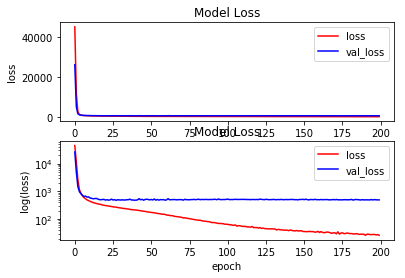

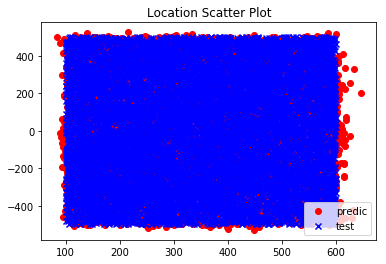

In [32]:
#plot the loss data
import math
plt.subplot(211)
plt.plot(history.history['loss'],'r',label = 'loss')
plt.plot(history.history['val_loss'],'b', label = 'val_loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(212)
plt.semilogy(history.history['loss'],'r',label = 'loss')
plt.semilogy(history.history['val_loss'],'b', label = 'val_loss')
plt.title('Model Loss')
plt.ylabel('log(loss)')
plt.xlabel('epoch')
plt.legend()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Location Scatter Plot')
ax1.scatter(loc_prediction[:,0],loc_prediction[:,1],c = 'r',marker = 'o', label = 'predic')
ax1.scatter(location_test[:,0],location_test[:,1],c = 'b',marker = 'x', label = 'test')
plt.legend()
plt.show()

In [28]:
#The training result
loss = model.evaluate(impulses_test, location_test, verbose=1)
print ('Test loss & mean_absolute_error: ', loss)

10000/10000 [==============================] - 2s 209us/step
Test loss & mean_absolute_error:  [505.51715224609376, 15.736868658447266]


error distance is  23.91904841343309
max error distance is  165.91548195358033
min error distance is  0.07932404626704204


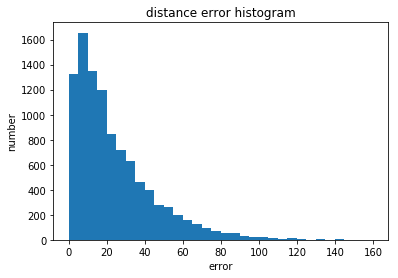

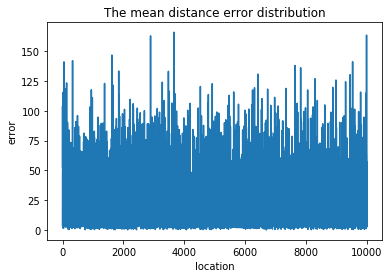

In [34]:
#calculate the mean of error distance
err = loc_prediction - location_test
x = err[:,:1]
y = err[:,1:]

err_abs = np.abs(err)
# err_abs_mean = np.mean(err_abs)
# print(err_abs_mean)
#print(err_abs_mean.shape)
err_dis = np.sqrt(np.square(x)+np.square(y))
err_min = np.min(err_dis)
err_max = np.max(err_dis)
err_avg = np.mean(err_dis)
print("error distance is ", err_avg)
print("max error distance is ", err_max)
print("min error distance is ", err_min)
#set the value of x, y, z
x,y,z = location_test[:,:1],location_test[:,1:2],err_dis

#plot the 2D image of error
plt.figure(1)
#plt.subplot(2,1,2)
plt.hist(err_dis, bins =  range(0,165,5)) 
plt.xlabel("error")
plt.ylabel("number")
plt.title("distance error histogram") 

plt.figure(2)
#plt.subplot(2,1,1)
plt.plot(err_dis)
plt.title("The mean distance error distribution")
plt.xlabel("location")
plt.ylabel("error")
plt.show()


Text(0.5, 0.92, 'The mean distance error of 3D Iamge')

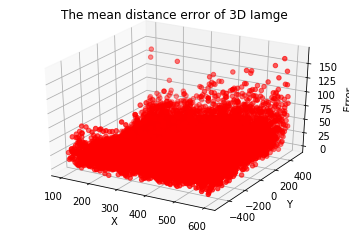

In [30]:
#plot 3D image
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,c='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Error")
plt.title("The mean distance error of 3D Iamge")

Text(0.5, 1.0, "The mean distance error of 'heat map'")

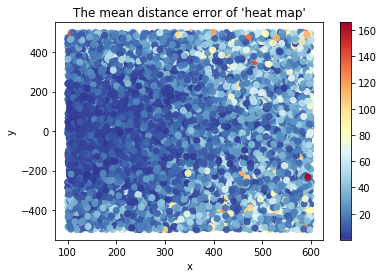

In [31]:
#draw the "heatmap" of error
fig = plt.figure()
ax3 = fig.add_subplot(111)
cm = plt.cm.get_cmap('RdYlBu_r') #Accent  RdYlBu_r RdYlBu  Blues_r  Greens  YlOrBr_r

sc = ax3.scatter(x,y,c = z, marker = 'o', label = 'test',alpha=0.9, cmap=cm)
plt.colorbar(sc)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
plt.title("The mean distance error of 'heat map'")